<a href="https://colab.research.google.com/github/RiteshDKgpian/X-tra-Telegram/blob/master/GC_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# data and import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.layers import Input, Dense, Activation
from tensorflow.keras.regularizers import Regularizer
from keras.models import Model
from keras.utils import np_utils
import keras
from keras.callbacks import ReduceLROnPlateau

In [ ]:
train_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GC DA 2023/train_data.csv")
train_data_freq=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GC DA 2023/train_data_freq_domain.csv")
train_data_ht=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GC DA 2023/train_data_ht.csv")
#train_data=train_data.drop("Unnamed: 0",axis=1)

In [ ]:

train_data

,Unnamed: 0,m,t,0,1,2,3,4,5,6,...,16,17,18,19,20,21,22,23,24,label
0,0,0,1,0.4337,0.7431,0.9390,0.7541,0.9035,0.7943,0.2622,...,0.6407,0.7027,0.7163,0.9954,0.8303,0.1641,0.7893,0.7533,0.2925,1
1,1,0,2,0.7859,0.1925,0.9024,0.8108,0.2016,0.9649,0.2445,...,0.7456,0.5750,0.7947,0.4663,0.4303,0.3643,0.0558,0.1330,0.0295,1
2,2,0,3,0.0512,0.9633,0.1423,0.8404,0.6654,0.4348,0.5751,...,0.5449,0.8531,0.6337,0.8807,0.2560,0.0597,0.5751,0.7797,0.8544,1
3,3,0,4,0.0413,0.1588,0.1675,0.0971,0.2918,0.1970,0.0971,...,0.5306,0.3109,0.2726,0.3298,0.4658,0.7479,0.8747,0.2677,0.3816,1
4,4,0,5,0.7042,0.4724,0.3901,0.2793,0.2522,0.1933,0.2694,...,0.5711,0.5686,0.6575,0.1447,0.5774,0.4022,0.6753,0.8371,0.6748,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,499995,49999,6,0.1691,0.9308,0.4897,0.7745,0.6919,0.7147,0.1966,...,0.4435,0.0846,0.6193,0.3040,0.9287,0.3918,0.2143,0.8486,0.3380,1
499996,499996,49999,7,0.2817,0.6392,0.9709,0.5667,0.0822,0.9976,0.7358,...,0.4254,0.7402,0.2611,0.8659,0.7473,0.1093,0.3094,0.7807,0.7287,1
499997,499997,49999,8,0.5622,0.7094,0.1205,0.7765,0.5579,0.4585,0.0583,...,0.7410,0.9113,0.3729,0.1165,0.0866,0.2817,0.4906,0.7756,0.5428,1
499998,499998,49999,9,0.3565,0.4717,0.6521,0.6147,0.2524,0.3296,0.1769,...,0.8423,0.5090,0.8436,0.9809,0.2696,0.5609,0.6706,0.1297,0.8826,1


In [ ]:
train_data_freq

,Unnamed: 0,Unnamed: 0.1,m,t,0,1,2,3,4,5,...,16,17,18,19,20,21,22,23,24,label
0,0,0,0,1,0.544950,0.528610,0.603880,0.502900,0.545620,0.502460,...,0.444330,0.625490,0.568880,0.624250,0.535740,0.459860,0.602090,0.558690,0.458920,1
1,1,1,0,2,0.096745,0.046354,0.156381,0.038310,0.083268,0.082533,...,0.097300,0.082704,0.095320,0.090742,0.059063,0.082544,0.018617,0.030186,0.125508,1
2,2,2,0,3,0.128010,0.085801,0.090838,0.162255,0.078053,0.113195,...,0.089996,0.079546,0.056026,0.035146,0.047315,0.079064,0.135717,0.076231,0.068144,1
3,3,3,0,4,0.111648,0.039914,0.051653,0.070263,0.087793,0.099663,...,0.066530,0.040271,0.103241,0.062675,0.090936,0.045542,0.044479,0.037062,0.068860,1
4,4,4,0,5,0.064267,0.033822,0.074632,0.139959,0.094217,0.103455,...,0.058425,0.076398,0.033553,0.165371,0.146208,0.086820,0.075252,0.057750,0.089198,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,499995,499995,49999,6,0.011270,0.089790,0.161030,0.036150,0.140110,0.036620,...,0.114570,0.059980,0.090220,0.152570,0.073310,0.069150,0.016100,0.082100,0.025420,1
499996,499996,499996,49999,7,0.047615,0.050094,0.094048,0.155581,0.085549,0.030886,...,0.023796,0.156463,0.015278,0.122350,0.027853,0.059787,0.029597,0.061248,0.098698,1
499997,499997,499997,49999,8,0.124858,0.071197,0.014713,0.031856,0.054532,0.128187,...,0.156706,0.082979,0.144415,0.151149,0.045862,0.085717,0.034044,0.130588,0.050171,1
499998,499998,499998,49999,9,0.088147,0.139291,0.125600,0.095507,0.102534,0.087251,...,0.063113,0.077819,0.004287,0.050025,0.067172,0.082738,0.091734,0.082538,0.057620,1


In [ ]:
train_data_ht

,Unnamed: 0,0x,0y,1x,1y,2x,2y,3x,3y,4x,...,20y,21x,21y,22x,22y,23x,23y,24x,24y,label
0,0,0.4337,-0.453465,0.6376,-0.088642,0.1973,-0.145695,0.5168,0.096518,0.9592,...,-0.499361,0.4008,-0.366526,0.4660,0.404053,0.7050,-0.424896,0.8169,0.140634,1
1,1,0.7431,-0.334013,0.4244,0.230670,0.2891,-0.390591,0.4325,0.096098,0.4214,...,0.389811,0.9148,-0.444346,0.0415,0.043065,0.9522,0.139648,0.3466,0.299383,1
2,2,0.9390,-0.152908,0.0110,-0.221699,0.5706,-0.211190,0.3189,0.027985,0.0954,...,0.301404,0.7630,-0.160720,0.4488,-0.448023,0.4706,0.046342,0.5019,-0.375607,1
3,3,0.7541,0.060262,0.6719,-0.537200,0.3083,-0.319800,0.4250,0.160888,0.8228,...,0.436686,0.9200,-0.197832,0.8861,0.056122,0.8632,-0.077161,0.8281,0.400740,1
4,4,0.9035,-0.031133,0.8419,-0.110948,0.9826,-0.384661,0.0308,-0.003636,0.8428,...,0.230115,0.7177,0.063100,0.3414,0.123053,0.7846,0.404292,0.0372,0.048729,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,499995,0.9550,-0.313623,0.5311,0.181990,0.2014,-0.079526,0.3675,0.014869,0.6077,...,0.001716,0.1325,0.122308,0.8976,-0.023026,0.9186,-0.158608,0.0270,-0.048640,1
499996,499996,0.8881,0.580378,0.3904,-0.182553,0.4899,-0.462334,0.3632,-0.128665,0.9360,...,0.635936,0.0138,-0.230203,0.3764,0.381468,0.3009,-0.010279,0.7201,-0.446354,1
499997,499997,0.0448,0.448597,0.7073,-0.052222,0.7943,-0.235670,0.4804,-0.321117,0.3490,...,-0.279795,0.5710,-0.410832,0.2471,-0.278998,0.8551,-0.397157,0.4489,0.109749,1
499998,499998,0.0579,-0.363608,0.3334,-0.183095,0.9506,-0.036174,0.8854,-0.021949,0.8283,...,-0.033380,0.7816,0.086113,0.7536,-0.095086,0.8257,0.136563,0.4848,-0.280306,1


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import (train_test_split,cross_val_predict,
                                     cross_val_score,cross_validate,GridSearchCV,StratifiedKFold
                                    )

# from sklearn import ensemble, linear_model,svm,neighbors,neural_network
from sklearn.metrics import (classification_report,confusion_matrix,multilabel_confusion_matrix,accuracy_score)#,
                            # auc,mean_absolute_error,r2_score,mean_squared_error,
                            # plot_roc_curve,roc_auc_score,roc_curve)
from sklearn.preprocessing import (OneHotEncoder,LabelEncoder,MinMaxScaler,StandardScaler,)
from keras.utils import to_categorical
# from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
t_data=train_data.iloc[:,1:29]
t_data

,m,t,0,1,2,3,4,5,6,7,...,16,17,18,19,20,21,22,23,24,label
0,0,1,0.4337,0.7431,0.9390,0.7541,0.9035,0.7943,0.2622,0.5901,...,0.6407,0.7027,0.7163,0.9954,0.8303,0.1641,0.7893,0.7533,0.2925,1
1,0,2,0.7859,0.1925,0.9024,0.8108,0.2016,0.9649,0.2445,0.8934,...,0.7456,0.5750,0.7947,0.4663,0.4303,0.3643,0.0558,0.1330,0.0295,1
2,0,3,0.0512,0.9633,0.1423,0.8404,0.6654,0.4348,0.5751,0.8067,...,0.5449,0.8531,0.6337,0.8807,0.2560,0.0597,0.5751,0.7797,0.8544,1
3,0,4,0.0413,0.1588,0.1675,0.0971,0.2918,0.1970,0.0971,0.2039,...,0.5306,0.3109,0.2726,0.3298,0.4658,0.7479,0.8747,0.2677,0.3816,1
4,0,5,0.7042,0.4724,0.3901,0.2793,0.2522,0.1933,0.2694,0.4110,...,0.5711,0.5686,0.6575,0.1447,0.5774,0.4022,0.6753,0.8371,0.6748,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,49999,6,0.1691,0.9308,0.4897,0.7745,0.6919,0.7147,0.1966,0.7731,...,0.4435,0.0846,0.6193,0.3040,0.9287,0.3918,0.2143,0.8486,0.3380,1
499996,49999,7,0.2817,0.6392,0.9709,0.5667,0.0822,0.9976,0.7358,0.9617,...,0.4254,0.7402,0.2611,0.8659,0.7473,0.1093,0.3094,0.7807,0.7287,1
499997,49999,8,0.5622,0.7094,0.1205,0.7765,0.5579,0.4585,0.0583,0.1459,...,0.7410,0.9113,0.3729,0.1165,0.0866,0.2817,0.4906,0.7756,0.5428,1
499998,49999,9,0.3565,0.4717,0.6521,0.6147,0.2524,0.3296,0.1769,0.9617,...,0.8423,0.5090,0.8436,0.9809,0.2696,0.5609,0.6706,0.1297,0.8826,1


In [ ]:
# t_data[]
t_data_flatten=t_data.iloc[:,2:27]
t_array=t_data_flatten.to_numpy()
t_array=t_array.reshape(int(len(t_data)/10),10,25)
print(np.shape(t_array))
img_array=pd.Series(t_array.tolist())
t_flatten_df=pd.DataFrame()
t_flatten_df['img_array']=img_array


t_flatten_df

(50000, 10, 25)


,img_array
0,"[[0.4337, 0.7431, 0.939, 0.7541, 0.9035, 0.794..."
1,"[[0.4013, 0.6779, 0.9426, 0.3566, 0.3919, 0.09..."
2,"[[0.8912, 0.4076, 0.8245, 0.7026, 0.7784, 0.41..."
3,"[[0.4849, 0.8162, 0.7418, 0.164, 0.0961, 0.429..."
4,"[[0.2426, 0.3405, 0.9523, 0.4741, 0.9078, 0.70..."
...,...
49995,"[[0.9557, 0.836, 0.3574, 0.7364, 0.8689, 0.576..."
49996,"[[0.5495, 0.1433, 0.1085, 0.5104, 0.3456, 0.48..."
49997,"[[0.803, 0.7452, 0.1653, 0.8079, 0.6092, 0.554..."
49998,"[[0.9413, 0.7847, 0.6995, 0.0993, 0.7468, 0.44..."


In [ ]:
# pd.DataFrame(t_array)

In [ ]:
t_data_freq=train_data_freq.iloc[:,4:29]
t_data_freq

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.544950,0.528610,0.603880,0.502900,0.545620,0.502460,0.405520,0.590070,0.512240,0.660370,...,0.450900,0.444330,0.625490,0.568880,0.624250,0.535740,0.459860,0.602090,0.558690,0.458920
1,0.096745,0.046354,0.156381,0.038310,0.083268,0.082533,0.077898,0.033475,0.055279,0.047754,...,0.114620,0.097300,0.082704,0.095320,0.090742,0.059063,0.082544,0.018617,0.030186,0.125508
2,0.128010,0.085801,0.090838,0.162255,0.078053,0.113195,0.031282,0.063346,0.155033,0.058228,...,0.111322,0.089996,0.079546,0.056026,0.035146,0.047315,0.079064,0.135717,0.076231,0.068144
3,0.111648,0.039914,0.051653,0.070263,0.087793,0.099663,0.080586,0.168222,0.129118,0.064072,...,0.061793,0.066530,0.040271,0.103241,0.062675,0.090936,0.045542,0.044479,0.037062,0.068860
4,0.064267,0.033822,0.074632,0.139959,0.094217,0.103455,0.082513,0.113834,0.049690,0.096774,...,0.077452,0.058425,0.076398,0.033553,0.165371,0.146208,0.086820,0.075252,0.057750,0.089198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0.011270,0.089790,0.161030,0.036150,0.140110,0.036620,0.036120,0.012790,0.020100,0.186830,...,0.068380,0.114570,0.059980,0.090220,0.152570,0.073310,0.069150,0.016100,0.082100,0.025420
499996,0.047615,0.050094,0.094048,0.155581,0.085549,0.030886,0.056335,0.194962,0.063932,0.045567,...,0.073694,0.023796,0.156463,0.015278,0.122350,0.027853,0.059787,0.029597,0.061248,0.098698
499997,0.124858,0.071197,0.014713,0.031856,0.054532,0.128187,0.100871,0.051348,0.024126,0.074402,...,0.041552,0.156706,0.082979,0.144415,0.151149,0.045862,0.085717,0.034044,0.130588,0.050171
499998,0.088147,0.139291,0.125600,0.095507,0.102534,0.087251,0.091355,0.044903,0.094968,0.028059,...,0.008198,0.063113,0.077819,0.004287,0.050025,0.067172,0.082738,0.091734,0.082538,0.057620


In [ ]:
# t_data[]
t_array_freq=t_data_freq.to_numpy()
t_array_freq=t_array_freq.reshape(int(len(t_data)/10),10,25)
print(np.shape(t_array_freq))

img_array_freq=pd.Series(t_array_freq.tolist())
t_flatten_df['img_array_freq']=img_array_freq

(50000, 10, 25)


In [ ]:
t_data_ht=train_data_ht.iloc[:,1:51]
t_data_ht

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,...,20x,20y,21x,21y,22x,22y,23x,23y,24x,24y
0,0.4337,-0.453465,0.6376,-0.088642,0.1973,-0.145695,0.5168,0.096518,0.9592,-0.194470,...,0.7808,-0.499361,0.4008,-0.366526,0.4660,0.404053,0.7050,-0.424896,0.8169,0.140634
1,0.7431,-0.334013,0.4244,0.230670,0.2891,-0.390591,0.4325,0.096098,0.4214,0.307603,...,0.9692,0.389811,0.9148,-0.444346,0.0415,0.043065,0.9522,0.139648,0.3466,0.299383
2,0.9390,-0.152908,0.0110,-0.221699,0.5706,-0.211190,0.3189,0.027985,0.0954,-0.296311,...,0.5404,0.301404,0.7630,-0.160720,0.4488,-0.448023,0.4706,0.046342,0.5019,-0.375607
3,0.7541,0.060262,0.6719,-0.537200,0.3083,-0.319800,0.4250,0.160888,0.8228,-0.481146,...,0.4679,0.436686,0.9200,-0.197832,0.8861,0.056122,0.8632,-0.077161,0.8281,0.400740
4,0.9035,-0.031133,0.8419,-0.110948,0.9826,-0.384661,0.0308,-0.003636,0.8428,0.147521,...,0.2612,0.230115,0.7177,0.063100,0.3414,0.123053,0.7846,0.404292,0.0372,0.048729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0.9550,-0.313623,0.5311,0.181990,0.2014,-0.079526,0.3675,0.014869,0.6077,-0.441386,...,0.9174,0.001716,0.1325,0.122308,0.8976,-0.023026,0.9186,-0.158608,0.0270,-0.048640
499996,0.8881,0.580378,0.3904,-0.182553,0.4899,-0.462334,0.3632,-0.128665,0.9360,0.003145,...,0.4351,0.635936,0.0138,-0.230203,0.3764,0.381468,0.3009,-0.010279,0.7201,-0.446354
499997,0.0448,0.448597,0.7073,-0.052222,0.7943,-0.235670,0.4804,-0.321117,0.3490,0.051792,...,0.1163,-0.279795,0.5710,-0.410832,0.2471,-0.278998,0.8551,-0.397157,0.4489,0.109749
499998,0.0579,-0.363608,0.3334,-0.183095,0.9506,-0.036174,0.8854,-0.021949,0.8283,-0.366803,...,0.9875,-0.033380,0.7816,0.086113,0.7536,-0.095086,0.8257,0.136563,0.4848,-0.280306


In [ ]:
# t_data[]
t_array_ht=t_data_ht.to_numpy()
t_array_ht=t_array_ht.reshape(int(len(t_data)/10),10,50)
print(np.shape(t_array_ht))

img_array_ht=pd.Series(t_array_ht.tolist())
t_flatten_df['img_array_ht']=img_array_ht

(50000, 10, 50)


# recurrence plots

In [ ]:
def recurrence_plot(x, eps=None, steps=None):
    if eps is None:
        eps = 0.1 * np.std(x)

    if steps is None:
        steps = 10

    N = len(x)
    R = np.zeros((N, N))

    for i_fn in range(N):
        for j_fn in range(i_fn, N):
            if np.abs(x[i_fn] - x[j_fn]) < eps:
                R[i_fn,j_fn] = 1
                R[j_fn,i_fn] = 1

    for i_fn in range(N):
        for j_fn in range(i_fn, N):
            for k in range(1, steps+1):
                if i_fn+k < N and j_fn+k < N and R[i_fn,j_fn] == 1 and R[i_fn+k,j_fn+k] == 1:
                    R[i_fn,j_fn] = k/steps
                    R[j_fn,i_fn] = k/steps
                    break

    return R

In [ ]:
a = np.array([[1, 2], [3, 4], [5, 6]])
b = np.array([[7,8], [8,9], [9,10]])

# join the arrays column-wise
a = np.hstack((a, b))

# print the result
print(a)

[[ 1  2  7  8]
 [ 3  4  8  9]
 [ 5  6  9 10]]


In [ ]:
from tqdm import tqdm
# create an empty column with dtype=object
t_flatten_df['recplt_img_array'] = np.empty((int(len(train_data)/10),), dtype=object)

# iterate over subsets of train_data and create recurrence plots
for j in tqdm(range(0, int(len(train_data)/10)), desc ="Rec plots"):
  img = None
  for i in np.arange(25):
    if i == 0:
      img = recurrence_plot(train_data.iloc[(int(j*10)):(int(j*10+10)),int(3)].to_numpy())
    else:
      img = np.hstack((img, recurrence_plot(train_data.iloc[(int(j*10)):(int(j*10+10)), int((i+3))].to_numpy())))
  # assign the concatenated image to a new row in the column
  t_flatten_df['recplt_img_array'].iloc[int(j)] = img

Rec plots: 100%|██████████| 50000/50000 [10:17<00:00, 80.92it/s]


In [ ]:
t_recplt_array=t_flatten_df['recplt_img_array'].to_numpy()
len(t_recplt_array[0])

10

<ipython-input-21-dcb5d7a63fe6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_flatten_df['label'][i]=label
/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,img_array,img_array_freq,img_array_ht,label
0,"[[0.4337, 0.7431, 0.939, 0.7541, 0.9035, 0.794...","[[0.5449499999999999, 0.5286099999999999, 0.60...","[[0.4336999999999997, -0.4534654081266983, 0.6...",1.0
1,"[[0.4013, 0.6779, 0.9426, 0.3566, 0.3919, 0.09...","[[0.58979, 0.55932, 0.47637, 0.37936, 0.564589...","[[0.4096999999999998, 0.0163445520272778, 0.95...",2.0
2,"[[0.8912, 0.4076, 0.8245, 0.7026, 0.7784, 0.41...","[[0.37157, 0.66843, 0.51542, 0.4574, 0.49639, ...","[[0.8303000000000001, 0.4939681686371389, 0.97...",3.0
3,"[[0.4849, 0.8162, 0.7418, 0.164, 0.0961, 0.429...","[[0.4852, 0.4196, 0.5783400000000001, 0.480819...","[[0.9648999999999998, 0.0576195509654215, 0.38...",1.0
4,"[[0.2426, 0.3405, 0.9523, 0.4741, 0.9078, 0.70...","[[0.4656599999999999, 0.51119, 0.6777, 0.64071...","[[0.4259, -0.1981294121857138, 0.525, 0.028315...",1.0
...,...,...,...,...
49995,"[[0.9557, 0.836, 0.3574, 0.7364, 0.8689, 0.576...","[[0.51285, 0.69912, 0.5239100000000001, 0.4913...","[[0.7719, 0.0316188686571654, 0.969, -0.347515...",0.0
49996,"[[0.5495, 0.1433, 0.1085, 0.5104, 0.3456, 0.48...","[[0.51949, 0.5310600000000001, 0.51062, 0.6077...","[[0.5202, 0.6493651045444437, 0.4195, -0.33673...",3.0
49997,"[[0.803, 0.7452, 0.1653, 0.8079, 0.6092, 0.554...","[[0.5645200000000001, 0.5392899999999999, 0.42...","[[0.3665, 0.2063418624484304, 0.00689999999999...",1.0
49998,"[[0.9413, 0.7847, 0.6995, 0.0993, 0.7468, 0.44...","[[0.5704100000000001, 0.5250999999999999, 0.47...","[[0.6107, 0.1438541620476974, 0.7832, -0.26477...",0.0


In [ ]:
t_flatten_df['img_array']=t_flatten_df['img_array'].apply(np.asarray)

In [ ]:
type(t_recplt_array[0])

numpy.ndarray

# label

In [ ]:
t_flatten_df['label']=np.zeros(len(t_flatten_df))
label=0
for i in np.arange(len(t_data)/10):
  label=t_data['label'][10*i]
  t_flatten_df['label'][i]=label
t_flatten_df

<ipython-input-22-dcb5d7a63fe6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_flatten_df['label'][i]=label
/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,img_array,label
0,"[[0.4337, 0.7431, 0.939, 0.7541, 0.9035, 0.794...",1.0
1,"[[0.4013, 0.6779, 0.9426, 0.3566, 0.3919, 0.09...",2.0
2,"[[0.8912, 0.4076, 0.8245, 0.7026, 0.7784, 0.41...",3.0
3,"[[0.4849, 0.8162, 0.7418, 0.164, 0.0961, 0.429...",1.0
4,"[[0.2426, 0.3405, 0.9523, 0.4741, 0.9078, 0.70...",1.0
...,...,...
49995,"[[0.9557, 0.836, 0.3574, 0.7364, 0.8689, 0.576...",0.0
49996,"[[0.5495, 0.1433, 0.1085, 0.5104, 0.3456, 0.48...",3.0
49997,"[[0.803, 0.7452, 0.1653, 0.8079, 0.6092, 0.554...",1.0
49998,"[[0.9413, 0.7847, 0.6995, 0.0993, 0.7468, 0.44...",0.0


# split

In [ ]:
# X = t_flatten_df['img_array']
x=t_array
# x=t_recplt_array
# x = np.array([np.array(val) for val in x])
X=x
y = to_categorical(t_flatten_df["label"].to_numpy())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42,stratify=y)

In [ ]:
np.shape(X_train[0])

(10, 25)

In [ ]:
# pd.DataFrame(X_train)

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
X_train[0]

array([[1.611e-01, 2.241e-01, 9.797e-01, 7.043e-01, 8.147e-01, 4.631e-01,
        7.088e-01, 1.566e-01, 4.580e-02, 8.404e-01, 3.890e-02, 8.250e-01,
        4.146e-01, 6.858e-01, 7.778e-01, 5.039e-01, 8.192e-01, 9.846e-01,
        7.732e-01, 9.300e-02, 3.859e-01, 4.000e-04, 7.896e-01, 8.794e-01,
        5.773e-01],
       [4.370e-01, 4.518e-01, 6.410e-01, 1.977e-01, 6.680e-02, 7.645e-01,
        3.588e-01, 2.396e-01, 7.442e-01, 1.190e-02, 5.430e-02, 2.073e-01,
        7.207e-01, 1.597e-01, 2.018e-01, 5.611e-01, 1.474e-01, 2.680e-02,
        9.245e-01, 8.332e-01, 8.046e-01, 4.284e-01, 6.011e-01, 7.380e-01,
        1.504e-01],
       [6.941e-01, 1.239e-01, 9.960e-02, 4.325e-01, 3.300e-03, 6.257e-01,
        8.695e-01, 4.039e-01, 2.154e-01, 6.730e-02, 4.194e-01, 9.799e-01,
        3.749e-01, 6.590e-01, 7.241e-01, 3.868e-01, 6.621e-01, 8.802e-01,
        5.630e-02, 8.218e-01, 8.210e-02, 6.174e-01, 9.691e-01, 5.760e-02,
        5.418e-01],
       [8.023e-01, 8.623e-01, 9.190e-01, 3.522e-01, 

In [ ]:
type(X_train[0])

numpy.ndarray

In [ ]:
np.shape(y_train[0])

(4,)

# overfit model

In [ ]:
# del model
model = models.Sequential()
model.add(layers.Conv2D(50 , (2, 2), activation='tanh', input_shape=(10,25,1)))
model.add(layers.BatchNormalization())
# model.add(layers.AveragePooling2D((1, 2)))

model.add(layers.Conv2D(100, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(10, (2, 2), activation='relu'))
#model.add(layers.GlobalAveragePooling2D())

# model.add(layers.Dropout(.2))

model.add(layers.Flatten())
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(10))
model.add(layers.Dense(4,activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 9, 24, 50)         250       
                                                                 
 batch_normalization_12 (Bat  (None, 9, 24, 50)        200       
 chNormalization)                                                
                                                                 
 conv2d_19 (Conv2D)          (None, 7, 22, 100)        45100     
                                                                 
 batch_normalization_13 (Bat  (None, 7, 22, 100)       400       
 chNormalization)                                                
                                                                 
 conv2d_20 (Conv2D)          (None, 6, 21, 10)         4010      
                                                                 
 flatten_3 (Flatten)         (None, 1260)             

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

Epoch 1/10
1250/1250 [==============================] - 11s 6ms/step - loss: 1.3805 - accuracy: 0.2817 - val_loss: 1.3803 - val_accuracy: 0.2821
Epoch 2/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.3804 - accuracy: 0.2817 - val_loss: 1.3802 - val_accuracy: 0.2821
Epoch 3/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.3803 - accuracy: 0.2822 - val_loss: 1.3805 - val_accuracy: 0.2821
Epoch 4/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.3804 - accuracy: 0.2817 - val_loss: 1.3803 - val_accuracy: 0.2821
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3803 - accuracy: 0.2822 - val_loss: 1.3804 - val_accuracy: 0.2821
Epoch 6/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.3804 - accuracy: 0.2822 - val_loss: 1.3803 - val_accuracy: 0.2821
Epoch 7/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.3803 - accuracy: 0.2822 - val_loss: 1.3803 - val_accuracy

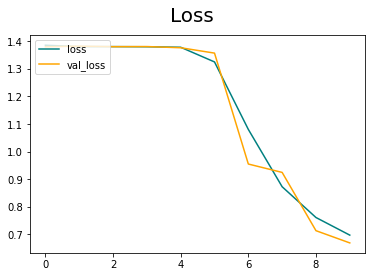

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

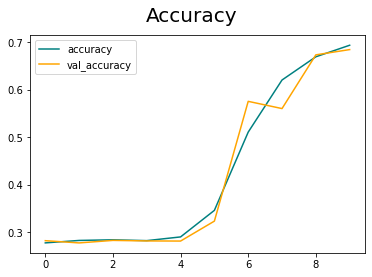

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# reasonable model

In [ ]:
# del model
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='tanh', input_shape=(10,25,1)))
model.add(layers.AveragePooling2D((1, 2)))

model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((1, 2)))

model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10))
model.add(layers.Dense(4,activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 9, 24, 32)         160       
                                                                 
 average_pooling2d_2 (Averag  (None, 9, 12, 32)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 11, 64)         8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 8, 5, 64)          0         
                                                                 
 flatten_2 (Flatten)         (None, 2560)             

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

Epoch 1/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.3822 - accuracy: 0.2765 - val_loss: 1.3803 - val_accuracy: 0.2821
Epoch 2/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.3811 - accuracy: 0.2786 - val_loss: 1.3805 - val_accuracy: 0.2821
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3810 - accuracy: 0.2765 - val_loss: 1.3809 - val_accuracy: 0.2821
Epoch 4/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.3813 - accuracy: 0.2805 - val_loss: 1.3805 - val_accuracy: 0.2821
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3811 - accuracy: 0.2777 - val_loss: 1.3804 - val_accuracy: 0.2821
Epoch 6/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.3814 - accuracy: 0.2786 - val_loss: 1.3803 - val_accuracy: 0.2821
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3811 - accuracy: 0.2816 - val_loss: 1.3806 - val_accuracy:

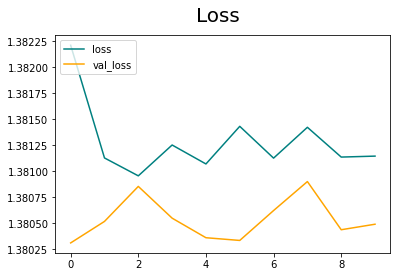

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

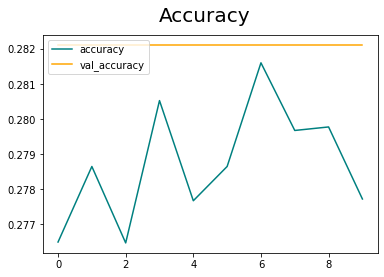

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
# model.save('image_class_meanp_model.h5')

# resnet

In [ ]:
def build_resnet(mf,input_shape, n_feature_maps, nb_classes):
    print ('build conv_x')
    x = layers.Input(shape=(input_shape))
    conv_x = layers.BatchNormalization()(x)
    conv_x = layers.Conv2D(n_feature_maps, (8*mf,8), 1, padding='same')(conv_x)
    conv_x = layers.BatchNormalization()(conv_x)
    conv_x = layers.Activation('tanh')(conv_x)

    print ('build conv_y')
    conv_y = layers.Conv2D(n_feature_maps, 5, 1, padding='same')(conv_x)
    conv_y = layers.BatchNormalization()(conv_y)
    conv_y = layers.Activation('relu')(conv_y)

    print ('build conv_z')
    conv_z = layers.Conv2D(n_feature_maps, 3, 1, padding='same')(conv_y)
    conv_z = layers.BatchNormalization()(conv_z)

    is_expand_channels = not (input_shape[-1] == n_feature_maps)
    if is_expand_channels:
        shortcut_y = layers.Conv2D(n_feature_maps, 1, 1,padding='same')(x)
        shortcut_y = layers.BatchNormalization()(shortcut_y)
    else:
        shortcut_y = layers.BatchNormalization()(x)
    print ('Merging skip connection')
    y = layers.add([shortcut_y, conv_z])
    y = layers.Activation('relu')(y)

    print ('build conv_x')
    x1 = y
    conv_x = layers.Conv2D(n_feature_maps*2, 8, 1, padding='same')(x1)
    conv_x = layers.BatchNormalization()(conv_x)
    conv_x = layers.Activation('relu')(conv_x)

    print ('build conv_y')
    conv_y = layers.Conv2D(n_feature_maps*2, 5, 1, padding='same')(conv_x)
    conv_y = layers.BatchNormalization()(conv_y)
    conv_y = layers.Activation('relu')(conv_y)

    print ('build conv_z')
    conv_z = layers.Conv2D(n_feature_maps*2, 3, 1, padding='same')(conv_y)
    conv_z = layers.BatchNormalization()(conv_z)

    is_expand_channels = not (input_shape[-1] == n_feature_maps*2)
    if is_expand_channels:
        shortcut_y = layers.Conv2D(n_feature_maps*2, 1, 1,padding='same')(x1)
        shortcut_y = layers.BatchNormalization()(shortcut_y)
    else:
        shortcut_y = layers.BatchNormalization()(x1)
    print ('Merging skip connection')
    y = layers.add([shortcut_y, conv_z])
    y = layers.Activation('relu')(y)

    print ('build conv_x')
    x1 = y
    conv_x = layers.Conv2D(n_feature_maps*2, 8, 1, padding='same')(x1)
    conv_x = layers.BatchNormalization()(conv_x)
    conv_x = layers.Activation('relu')(conv_x)

    print ('build conv_y')
    conv_y = layers.Conv2D(n_feature_maps*2, 5, 1, padding='same')(conv_x)
    conv_y = layers.BatchNormalization()(conv_y)
    conv_y = layers.Activation('relu')(conv_y)

    print ('build conv_z')
    conv_z = layers.Conv2D(n_feature_maps*2, 3, 1, padding='same')(conv_y)
    conv_z = layers.BatchNormalization()(conv_z)

    is_expand_channels = not (input_shape[-1] == n_feature_maps*2)
    if is_expand_channels:
        shortcut_y = layers.Conv2D(n_feature_maps*2, 1, 1,padding='same')(x1)
        shortcut_y = layers.BatchNormalization()(shortcut_y)
    else:
        shortcut_y = layers.BatchNormalization()(x1)
    print ('Merging skip connection')
    y = layers.add([shortcut_y, conv_z])
    y = layers.Activation('relu')(y)

    full = layers.GlobalAveragePooling2D()(y)
#     drop = layers.Dropout(.2)(full)
    b_out=layers.Dense(500,activation='relu')(full)
    out = layers.Dense(nb_classes, activation='softmax')(b_out)
    print ('        -- model was built.')
    return x, out



x2 , y2 = build_resnet(1,(10,25,1), 25, 4)
model2 = Model(inputs=x2, outputs=y2)

model2.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

build conv_x
build conv_y
build conv_z
Merging skip connection
build conv_x
build conv_y
build conv_z
Merging skip connection
build conv_x
build conv_y
build conv_z
Merging skip connection
        -- model was built.


In [ ]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10, 25, 1)]  0           []                               
                                                                                                  
 batch_normalization (BatchNorm  (None, 10, 25, 1)   4           ['input_1[0][0]']                
 alization)                                                                                       
                                                                                                  
 conv2d_6 (Conv2D)              (None, 10, 25, 25)   1625        ['batch_normalization[0][0]']    
                                                                                                  
 batch_normalization_1 (BatchNo  (None, 10, 25, 25)  100         ['conv2d_6[0][0]']           

Epoch 1/10
2500/2500 [==============================] - 48s 15ms/step - loss: 1.3826 - accuracy: 0.2807 - val_loss: 1.3799 - val_accuracy: 0.2821
Epoch 2/10
2500/2500 [==============================] - 32s 13ms/step - loss: 1.3696 - accuracy: 0.2980 - val_loss: 1.3282 - val_accuracy: 0.3521
Epoch 3/10
2500/2500 [==============================] - 31s 13ms/step - loss: 1.0398 - accuracy: 0.5234 - val_loss: 0.7875 - val_accuracy: 0.6333
Epoch 4/10
2500/2500 [==============================] - 34s 14ms/step - loss: 0.6956 - accuracy: 0.6958 - val_loss: 0.5492 - val_accuracy: 0.7685
Epoch 5/10
2500/2500 [==============================] - 31s 12ms/step - loss: 0.5575 - accuracy: 0.7599 - val_loss: 0.6964 - val_accuracy: 0.7031
Epoch 6/10
2500/2500 [==============================] - 31s 13ms/step - loss: 0.4884 - accuracy: 0.7877 - val_loss: 0.4795 - val_accuracy: 0.7941
Epoch 7/10
2500/2500 [==============================] - 32s 13ms/step - loss: 0.4380 - accuracy: 0.8113 - val_loss: 0.5511 -

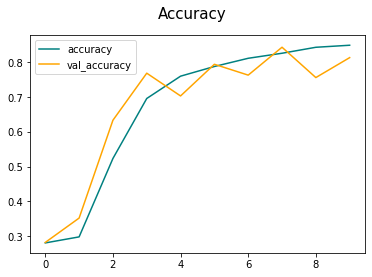

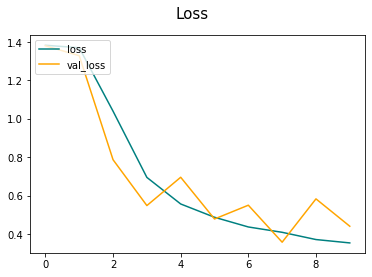

In [ ]:
history = model2.fit(X_train, y_train, epochs=10,batch_size = 16,
                    validation_data=(X_test, y_test))

fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=15)
plt.legend(loc="upper left")
plt.show()

fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=15)
plt.legend(loc="upper left")
plt.show()

In [ ]:
X_test.shape

(10000, 10, 25)

In [ ]:
y_pred=model2.predict(X_test)
# y_pred=[[1 if l>.492 else 0 for l in out] for out in y_pred]
y_pred=[[1 if val == np.max(out) else 0 for val in out] for out in y_pred]
print(multilabel_confusion_matrix(y_test,y_pred),"\n")
print("\nTHE ACCURACY SCORE-->",accuracy_score(y_test,y_pred),"\n")
print(classification_report(y_test,y_pred,digits=4))

313/313 [==============================] - 1s 3ms/step
[[[6681  599]
  [ 494 2226]]

 [[7413  403]
  [ 435 1749]]

 [[7257  468]
  [ 375 1900]]

 [[6781  398]
  [ 564 2257]]] 


THE ACCURACY SCORE--> 0.8132 

              precision    recall  f1-score   support

           0     0.7880    0.8184    0.8029      2720
           1     0.8127    0.8008    0.8067      2184
           2     0.8024    0.8352    0.8184      2275
           3     0.8501    0.8001    0.8243      2821

   micro avg     0.8132    0.8132    0.8132     10000
   macro avg     0.8133    0.8136    0.8131     10000
weighted avg     0.8142    0.8132    0.8133     10000
 samples avg     0.8132    0.8132    0.8132     10000

